In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('temp_datalab_records_social_facebook.csv', thousands=',', parse_dates=True)

/Users/JHZ/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


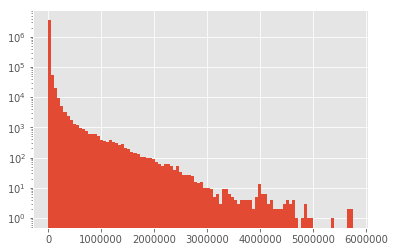

In [4]:
# Histogram of talkings
plt.hist(df.talking_about_count, bins=100, log=True)
plt.show()

In [5]:
# group by facebook id 
df_byid = df.groupby(['facebook_id', 'username'])

In [6]:
# ranking volatility of talkings
df_byid.std().sort_values('talking_about_count', ascending=False)

,,dataset_id,checkins,were_here_count,likes,talking_about_count,entity_id,cusip,isin
facebook_id,username,,,,,,,,
131459315949,CBSNews,0.0,2.238473,0.000000e+00,4.011813e+05,852774.807781,NaN,NaN,NaN
7724542745,manchesterunited,0.0,428.402511,4.926310e+05,3.391292e+06,690647.941761,NaN,NaN,NaN
350097413540,Storyful,0.0,0.000000,0.000000e+00,5.838706e+05,674762.393334,NaN,NaN,NaN
7040724713,yahoo,0.0,13430.368561,0.000000e+00,5.568533e+05,650379.771238,NaN,NaN,NaN
13652355666,usatoday,0.0,61.489997,0.000000e+00,2.549213e+06,538876.429033,NaN,NaN,NaN
134486075205,NYPost,0.0,585.720463,0.000000e+00,3.066668e+05,520474.008833,NaN,NaN,NaN
7175346442,wwe,0.0,55999.831854,0.000000e+00,4.671110e+06,509794.195966,NaN,NaN,NaN
5281959998,nytimes,0.0,11618.876784,0.000000e+00,1.715901e+06,485310.856850,NaN,NaN,NaN
6363207806,CollegeHumor,0.0,0.000000,0.000000e+00,1.054175e+06,466257.217508,NaN,NaN,NaN


In [7]:
df_byid_tlking = df_byid.std().sort_values('talking_about_count', ascending=False).reset_index()

In [8]:
# look at top 10 most talked entities
top10 = np.array(df_byid_tlking.facebook_id[0:10])

# reverse order
top10 = top10[::-1]

# a dic to map facebook id to username
id_usrnm = dict(zip(df_byid_tlking.facebook_id, df_byid_tlking.username))

/Users/JHZ/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


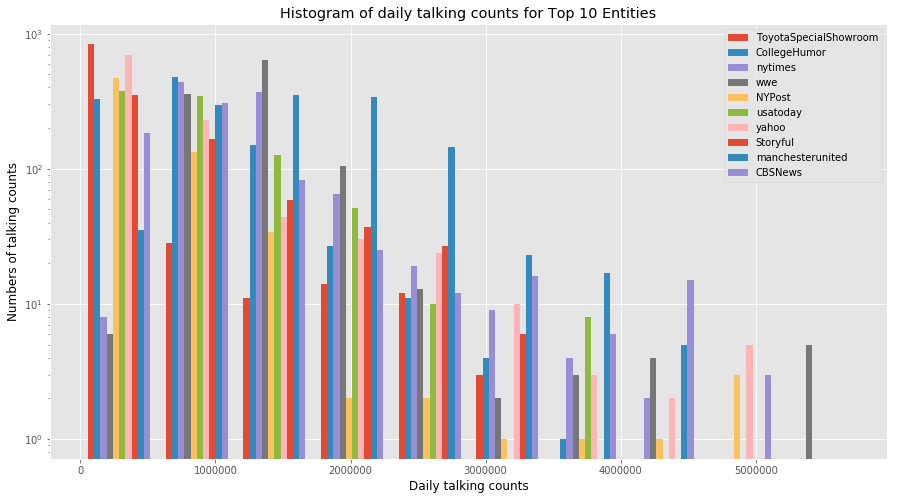

In [9]:
# Histogram viz of talking counts 
fig, ax1 = plt.subplots(figsize=(15,8))
labels = [id_usrnm[i] for i in top10]
frames = [df[df.facebook_id==i].talking_about_count for i in top10]
ax1.hist(frames, log=True, bins=10, histtype='bar')
#ax1.hist(frames, log=True, bins=10, stacked=True)


ax1.set_xlabel('Daily talking counts', color='black')
ax1.set_ylabel('Numbers of talking counts', color='black')
ax1.legend(labels,loc=0)

plt.title('Histogram of daily talking counts for Top 10 Entities')
plt.show()

In [10]:
# function for plot time series of talking counts
def tlkingcounts(df_i, j):
    t = pd.to_datetime(df_i.time)
    s1 = df_i.talking_about_count
    ax1.plot(t, s1, label=id_usrnm[j])
    ax1.set_xlabel('time (day)', color='black')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Talking Counts', color='black')
    #ax1.tick_params('y', colors='b')
    #ax1.axes.get_yaxis().set_visible(False)
    ax1.legend(loc='best')

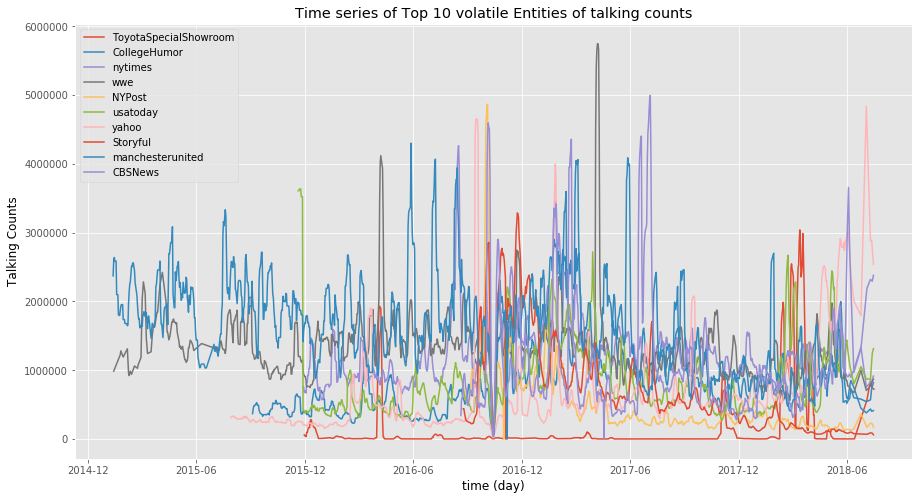

In [11]:
fig, ax1 = plt.subplots(figsize=(15,8))
for i in top10:
    df_i = df[df.facebook_id==i]
    tlkingcounts(df_i, i)
ax1.set_title('Time series of Top 10 volatile Entities of talking counts')
plt.show()